In [2]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input


In [3]:
# Load the pre-trained InceptionV3 model
model = InceptionResNetV2(weights='imagenet', include_top=False)


In [4]:
# Function to get the encoding of an image
def get_encoding(image_path):
    img = image.load_img(image_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    encoding = model.predict(x).flatten()
    return encoding


In [5]:
# Load the custom dataset
dataset_path = r'C:\Self_Study\PythonStudy\ImageClassification\second_project\이미지\all_train'
encodings = []
for filename in os.listdir(dataset_path):
    encoding = get_encoding(os.path.join(dataset_path, filename))
    encodings.append(encoding)
encodings = np.array(encodings)
filenames = os.listdir(dataset_path)


In [6]:
# Function to get the top 5 similar images
def get_top_5_similar_images(query_image_path):
    query_encoding = get_encoding(query_image_path)
    distances = np.linalg.norm(encodings - query_encoding, axis=1)
    sorted_indices = np.argsort(distances)
    return [filenames[i] for i in sorted_indices[:5]]


In [7]:
# Function to search for images
def search_images(query_image_path):
    similar_images = get_top_5_similar_images(query_image_path)
    # print("Top 5 similar images:")
    # for i, filename in enumerate(similar_images):
    #     print(f"{i+1}. {filename}")
    return similar_images


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
import glob
import pprint

from matplotlib.pylab import rcParams

rcParams['font.family']='Malgun Gothic' #malgul gothic
rcParams['figure.figsize']=17,8
import warnings
warnings.filterwarnings('ignore')


C:\Self_Study\PythonStudy\ImageClassification\second_project\이미지\all_test\test (4).jpg


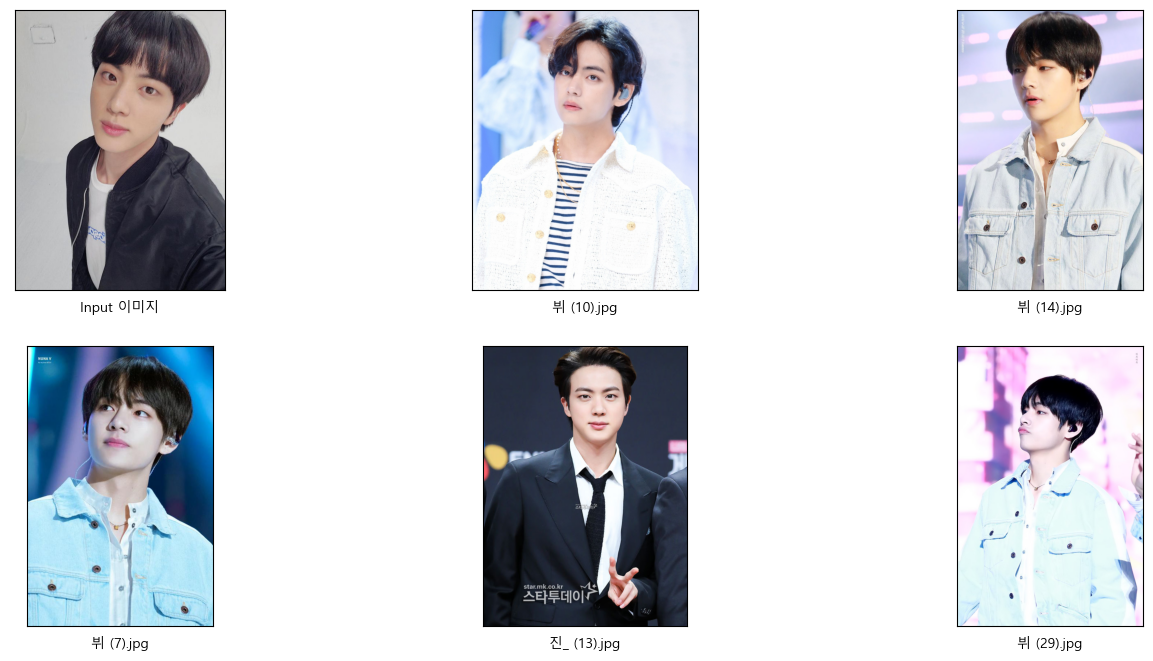

In [10]:
# Example usage
query_image_path = os.path.join(dataset_path, r'C:\Self_Study\PythonStudy\ImageClassification\second_project\이미지\all_test\test (4).jpg')
print(query_image_path)
search_images(query_image_path)

fig = plt.figure() # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3
i = 1
names = search_images(query_image_path)
names.insert(0, "Input 이미지")
# print(names)

paths = [ dataset_path+"\\"+imgs for imgs in search_images(query_image_path) ]
paths.insert(0, query_image_path)
# print(paths)

for image_select in paths:
    # print(image_select)
    img1 = img.imread(image_select)
    
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img1)
    ax.set_xlabel(names[i-1])
    ax.set_xticks([]), ax.set_yticks([])
    i += 1
 
plt.show()
